<a href="https://colab.research.google.com/github/balados85/ML_Labs/blob/main/Assignment_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 - Computer vision: Based on Keras**

##**Loading FashionMNIST data**

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.backend import clear_session
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
def load_data():
  (training_set, test_set), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    batch_size = -1,
    with_info=True,)
  
  ##Split training data into training and validation and scaling the data
  training_data, validation_data, training_labels, validation_labels = train_test_split(training_set[0].numpy(), training_set[1].numpy(),train_size=0.7, test_size = 0.3, random_state=100)
  training_data  = training_data/255.0        ## rescaling the data
  validation_data = validation_data/255.0     ## rescaling the data

  test_data = test_set[0].numpy()
  test_labels = test_set[1].numpy()
  test_data = test_data / 255.0

  ##Plot a sample of the data
  fig = plt.figure(figsize=(8,8))
  for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(training_data[i].squeeze())
    plt.grid(False)

  return training_data, training_labels, validation_data, validation_labels, test_data, test_labels

##**Building Multi Layer Perceptron**

In [10]:
def mlp_model():
  input_shape = (28,28)
  layers = [512, 320, 128]
  output_features = 10

  model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(input_shape)),
        tf.keras.layers.Dense(layers[0], activation = "relu"),
        tf.keras.layers.Dense(layers[1], activation="relu"),
        tf.keras.layers.Dense(layers[2], activation="relu"),
        tf.keras.layers.Dense(output_features, activation="softmax")                 
  ])
  model.compile(optimizer = "adam", loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
 

In [ ]:
 return model(mlp_model())

In [ ]:
print(model(mlp_model()))

##**Model evaluation**

In [16]:
def evaluate_model(model, train_data, train_label, val_data, val_labels, test_data, test_label):
  #model = mlp_model()
  hist = model.fit(x = train_data, y = train_label, batch_size = 32, epochs = 25, verbose = 1, validation_data = (val_data, val_labels))
  _, score_acc = model.evaluate(test_data, test_label)
  pred = model.predict(x = test_data, batch_size=32)
  y_pred = y_pred = np.argmax(pred, axis=1)
  return score_acc,hist

In [17]:
def plot_training(history):
    fig, axs = plt.subplots(1,2,figsize=(16,5)) 
    axs[0].plot(history.history['accuracy'], color = 'blue') 
    axs[0].plot(history.history['val_accuracy'], color = 'red') 
    axs[0].set_title('Model Accuracy') 
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch') 
    axs[0].legend(['train', 'validate'], loc='upper left') 
    
    axs[1].plot(history.history['loss'], color = 'blue') 
    axs[1].plot(history.history['val_loss'], color = 'red') 
    axs[1].set_title('Model Loss') 
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch') 
    axs[1].legend(['train', 'validate'], loc='upper right') 
    plt.show()

##**Run putting it all together**

Epoch 1/25
1313/1313 [==============================] - 11s 8ms/step - loss: 0.5071 - accuracy: 0.8154 - val_loss: 0.4107 - val_accuracy: 0.8491
Epoch 2/25
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3824 - accuracy: 0.8568 - val_loss: 0.3621 - val_accuracy: 0.8671
Epoch 3/25
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3408 - accuracy: 0.8725 - val_loss: 0.3468 - val_accuracy: 0.8752
Epoch 4/25
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3140 - accuracy: 0.8833 - val_loss: 0.3445 - val_accuracy: 0.8753
Epoch 5/25
1313/1313 [==============================] - 11s 9ms/step - loss: 0.2958 - accuracy: 0.8870 - val_loss: 0.3541 - val_accuracy: 0.8718
Epoch 6/25
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2799 - accuracy: 0.8933 - val_loss: 0.3427 - val_accuracy: 0.8799
Epoch 7/25
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2680 - accuracy: 0.8997 - val_loss: 0.3413 - val_ac

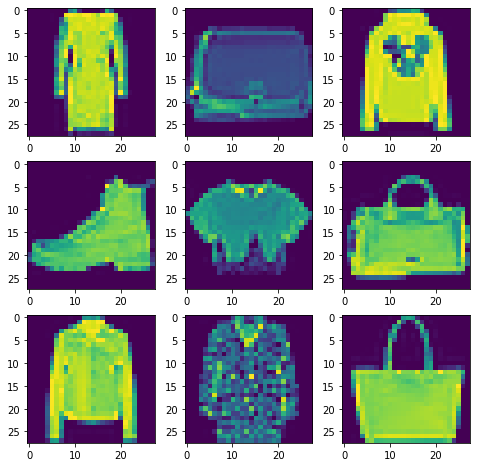

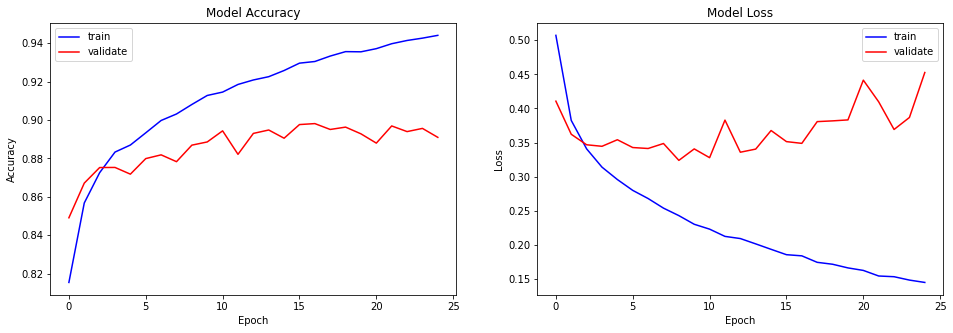

> 88.300


In [18]:
def evaluate_mlp():
  train_data, train_label, val_data, val_labels, test_data, test_label = load_data()
  model = mlp_model()
  score, history = evaluate_model(model, train_data, train_label, val_data, val_labels, test_data, test_label)
  plot_training(history)
  print('> %.3f' % (score_acc*100.0))
 
evaluate_mlp()

##**Build Convultional network**

In [19]:
def conv_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), padding='valid'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(32, (3, 3), padding='valid'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), padding='valid'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  model.compile(optimizer = "adam", loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
  return model

Epoch 1/25
1313/1313 [==============================] - 35s 27ms/step - loss: 0.8330 - accuracy: 0.6944 - val_loss: 0.5329 - val_accuracy: 0.7964
Epoch 2/25
1313/1313 [==============================] - 35s 26ms/step - loss: 0.5696 - accuracy: 0.7954 - val_loss: 0.4557 - val_accuracy: 0.8320
Epoch 3/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.4920 - accuracy: 0.8232 - val_loss: 0.4072 - val_accuracy: 0.8464
Epoch 4/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.4473 - accuracy: 0.8418 - val_loss: 0.3898 - val_accuracy: 0.8573
Epoch 5/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.4095 - accuracy: 0.8531 - val_loss: 0.3528 - val_accuracy: 0.8722
Epoch 6/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.3830 - accuracy: 0.8615 - val_loss: 0.3607 - val_accuracy: 0.8703
Epoch 7/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.3639 - accuracy: 0.8706 - val_loss: 0.3313 -

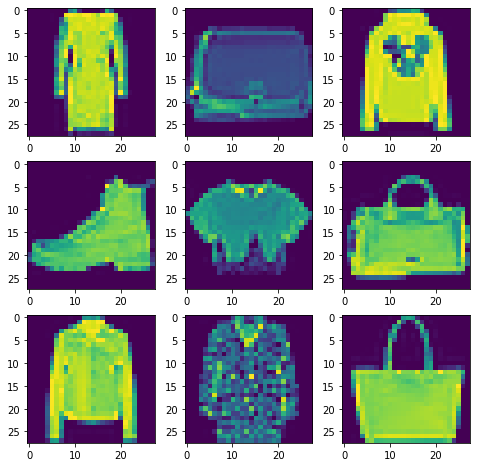

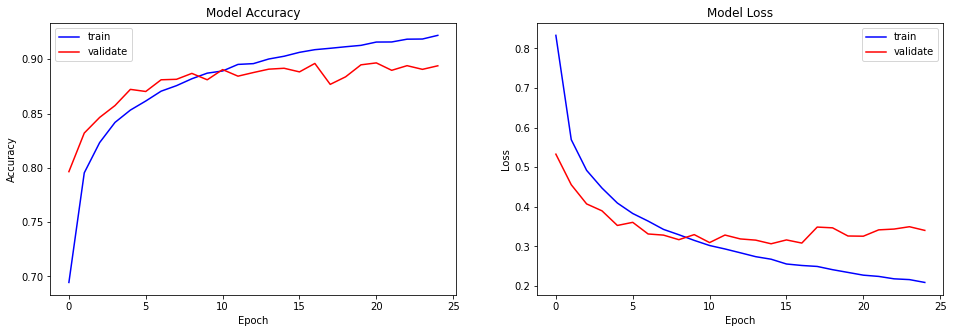

> 88.970


In [20]:
def evaluate_cnn():
  train_data, train_label, val_data, val_labels, test_data, test_label = load_data()
  model = conv_model()
  score, history = evaluate_model(model, train_data, train_label, val_data, val_labels, test_data, test_label)
  plot_training(history)
  print('> %.3f' % (score * 100.0))

evaluate_cnn()

#**Fine-tune pretrained models**

##**Reconstructing some layers in the Conv net**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

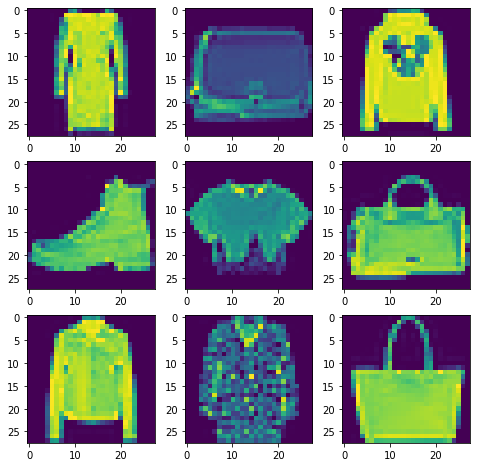

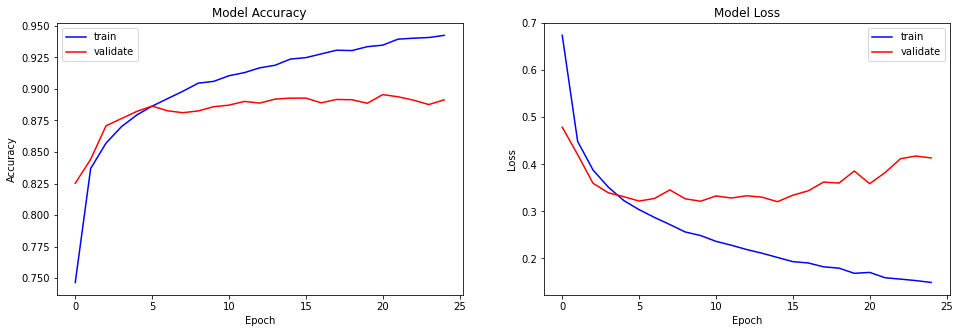

> 88.350


In [21]:
clear_session()
model = conv_model()
print(model.summary())
transfer_layer = model.get_layer('max_pooling2d_2')
conv_model = models.Model(inputs=model.input,outputs=transfer_layer.output)
reconstructed_model = Sequential()
reconstructed_model.add(conv_model)
reconstructed_model.add(Flatten())
reconstructed_model.add(Dense(1024, activation='relu'))
reconstructed_model.add(Dropout(0.5))
reconstructed_model.add(Dense(10, activation='softmax'))

reconstructed_model.compile(optimizer = "adam", loss = tf.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
print(reconstructed_model.summary())

def evaluate_reconstructed_net():
  train_data, train_label, val_data, val_labels, test_data, test_label = load_data()
  score, history = evaluate_model(reconstructed_model, train_data, train_label, val_data, val_labels, test_data, test_label)
  plot_training(history)
  print('> %.3f' % (score * 100.0))

evaluate_reconstructed_net()

##**Freezing layers**

In [22]:
def print_layer_trainable():
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [23]:
print_layer_trainable()

True:	conv2d
True:	activation
True:	max_pooling2d
True:	conv2d_1
True:	activation_1
True:	max_pooling2d_1
True:	conv2d_2
True:	activation_2
True:	max_pooling2d_2
True:	flatten
True:	dense
True:	activation_3
True:	dropout
True:	dense_1
True:	activation_4


In [24]:
model.get_layer('conv2d_2').trainable = False
model.get_layer('activation_2').trainable = False
model.get_layer('max_pooling2d_2').trainable = False

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

In [25]:
print_layer_trainable()

True:	conv2d
True:	activation
True:	max_pooling2d
True:	conv2d_1
True:	activation_1
True:	max_pooling2d_1
False:	conv2d_2
False:	activation_2
False:	max_pooling2d_2
True:	flatten
True:	dense
True:	activation_3
True:	dropout
True:	dense_1
True:	activation_4


In [26]:
def evaluate_froozen_conv():
  train_data, train_label, val_data, val_labels, test_data, test_label = load_data()
  score, history = evaluate_model(model, train_data, train_label, val_data, val_labels, test_data, test_label)
  plot_training(history)
  print('> %.3f' % (score * 100.0))

Epoch 1/25
1313/1313 [==============================] - 35s 26ms/step - loss: 0.4818 - accuracy: 0.8386 - val_loss: 0.3174 - val_accuracy: 0.8887
Epoch 2/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.2808 - accuracy: 0.9040 - val_loss: 0.3092 - val_accuracy: 0.8925
Epoch 3/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.2445 - accuracy: 0.9150 - val_loss: 0.3068 - val_accuracy: 0.8963
Epoch 4/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.2255 - accuracy: 0.9199 - val_loss: 0.3295 - val_accuracy: 0.8943
Epoch 5/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.2124 - accuracy: 0.9248 - val_loss: 0.3392 - val_accuracy: 0.8884
Epoch 6/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.2023 - accuracy: 0.9273 - val_loss: 0.3385 - val_accuracy: 0.8979
Epoch 7/25
1313/1313 [==============================] - 34s 26ms/step - loss: 0.1875 - accuracy: 0.9335 - val_loss: 0.3368 -

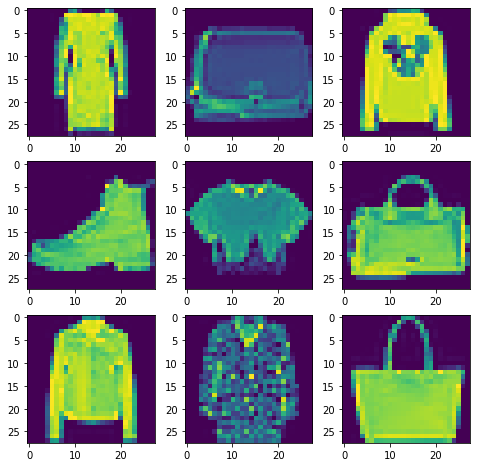

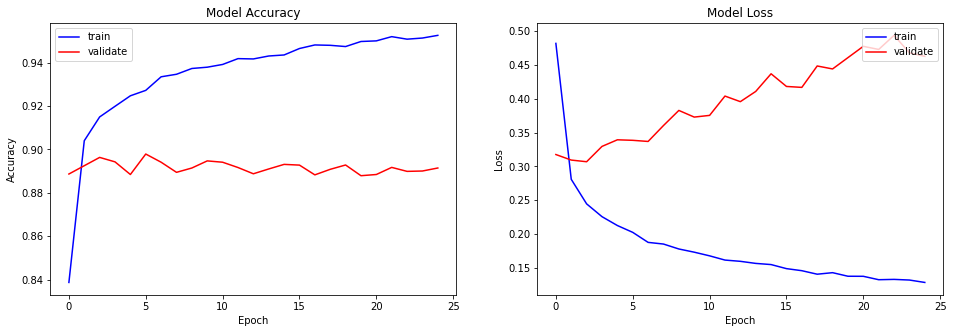

> 88.260


In [27]:
evaluate_froozen_conv()

#**Augmenting the Data**

In [28]:
def data_augmentation():
  train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2, 
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip = True,
    fill_mode = 'nearest'
  )

  test_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(
        'drive/MyDrive/data/hymenoptera_data/train',  
        target_size=(224, 224), 
        batch_size=16,
        class_mode='binary')  

  validation_generator = test_datagen.flow_from_directory(
        'drive/MyDrive/data/hymenoptera_data/val',
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary')
  return train_generator, validation_generator

In [29]:
def binary_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape = (224,224, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation('sigmoid'))
  model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
  return model

In [30]:
model_binary = binary_model() 
train_generator, validation_generator = data_augmentation()

history = model_binary.fit(x=train_generator,
                        epochs=25,
                        steps_per_epoch=16,
                        validation_data=validation_generator)

Found 243 images belonging to 2 classes.
Found 153 images belonging to 2 classes.
Epoch 1/25
16/16 [==============================] - 128s 8s/step - loss: 165.7299 - accuracy: 0.5062 - val_loss: 0.6905 - val_accuracy: 0.5425
Epoch 2/25
16/16 [==============================] - 19s 1s/step - loss: 1.2049 - accuracy: 0.5309 - val_loss: 0.6935 - val_accuracy: 0.4575
Epoch 3/25
16/16 [==============================] - 19s 1s/step - loss: 0.8252 - accuracy: 0.5432 - val_loss: 0.6934 - val_accuracy: 0.4575
Epoch 4/25
16/16 [==============================] - 19s 1s/step - loss: 0.7890 - accuracy: 0.5432 - val_loss: 0.6940 - val_accuracy: 0.4575
Epoch 5/25
16/16 [==============================] - 19s 1s/step - loss: 0.7489 - accuracy: 0.6008 - val_loss: 0.6943 - val_accuracy: 0.4575
Epoch 6/25
16/16 [==============================] - 19s 1s/step - loss: 1.4961 - accuracy: 0.5556 - val_loss: 0.6943 - val_accuracy: 0.4575
Epoch 7/25
16/16 [==============================] - 19s 1s/step - loss: 0.7

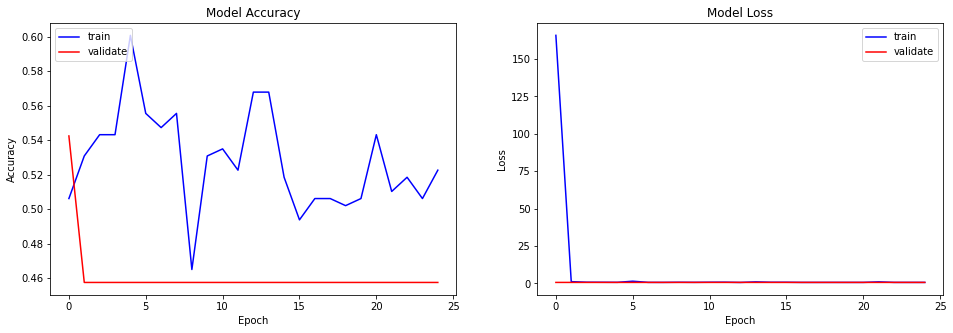

In [31]:
 plot_training(history)